# Shark Attack Project

### Created by Alvaro, Aurelie, Clara and Marc

For our project, we assessed and processed the data based on our business proposal of a "shark repellent" (à la snake oil). We are looking mostly at who we should advertise to and in which countries those advertisements should run, thus only cleaning and processing for the columns that concern our marketing/ads strategy.

In [21]:
import pandas as pd
import numpy as np
import re #for handling the date column

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://www.sharkattackfile.net/spreadsheets/GSAF5.xls'
shark_df = pd.read_excel(url)

# Working with a copy in order not to overwrite the original dataset with code with errors
shark_df_copy = shark_df.copy()
shark_df_copy

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2024-10-14 00:00:00,2024.0,Unprovoked,Honduras,Tela,Atlantida,Swimming,Roberto Carlose Bu Mejia,M,38,...,Bull shark,Georgienne Bradley: Daily Mail UK: FTN News.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-10-11 00:00:00,2024.0,Unprovoked,USA,Florida,Brevard County Orlando,Surfing,Teddy Witteman,M,16,...,Bull shark 6ft,Todd SmithFlorida today: News 4:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-09-17 00:00:00,2024.0,Unprovoked,Honduras,Trujillo Colon,Puerto Castillo,Diving for shellfish,Fernando Mendoza Ocampo,M,33,...,Bull shark 6-7ft,Daily Mail UK: The Sun UK: The World Watch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-09-16 00:00:00,2024.0,Unprovoked,Morocco,Southern Morocco,West of Dakhla,Swimming - jumped off yacht,German Tourist,F,30,...,Reportedly a Great White,Andy Currie: Moroccan World News: Sky News,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-08-26 00:00:00,2024.0,Unprovoked,Jamaica,Montego Bay,Falmouth,Spearfishing,Jahmari Reid,M,16,...,Reportedly Tiger Shark,Todd Smith: Daily Mail UK: Sky News: People .com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6968,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6969,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6970,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6971,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [22]:
shark_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6973 entries, 0 to 6972
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6973 non-null   object 
 1   Year            6971 non-null   float64
 2   Type            6955 non-null   object 
 3   Country         6923 non-null   object 
 4   State           6491 non-null   object 
 5   Location        6408 non-null   object 
 6   Activity        6387 non-null   object 
 7   Name            6753 non-null   object 
 8   Sex             6394 non-null   object 
 9   Age             3978 non-null   object 
 10  Injury          6938 non-null   object 
 11  Unnamed: 11     6411 non-null   object 
 12  Time            3447 non-null   object 
 13  Species         3841 non-null   object 
 14  Source          6954 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

In [23]:
#We can see that some columns are hidden in the Excel file and are unnecessary for our research, therefore we should drop them.
#Drop columns from 15 to 22
columns_to_drop = shark_df_copy.columns[15:23]
shark_df_copy = shark_df_copy.drop(columns=columns_to_drop, axis=1)

#Standardizing the names of every column 
shark_df_copy.columns = shark_df_copy.columns.str.strip().str.lower().str.replace(' ', '_')

#Dropping every row that has the value 'Invalid' in its type to prevent working with useless data
shark_df_copy.drop(shark_df_copy[shark_df_copy['type'] == 'Invalid'].index, inplace = True)
shark_df_copy

,date,year,type,country,state,location,activity,name,sex,age,injury,unnamed:_11,time,species,source
0,2024-10-14 00:00:00,2024.0,Unprovoked,Honduras,Tela,Atlantida,Swimming,Roberto Carlose Bu Mejia,M,38,Back and thigh extensive tissue loss,N,?,Bull shark,Georgienne Bradley: Daily Mail UK: FTN News.com
1,2024-10-11 00:00:00,2024.0,Unprovoked,USA,Florida,Brevard County Orlando,Surfing,Teddy Witteman,M,16,Bite to left arm,N,?,Bull shark 6ft,Todd SmithFlorida today: News 4:
2,2024-09-17 00:00:00,2024.0,Unprovoked,Honduras,Trujillo Colon,Puerto Castillo,Diving for shellfish,Fernando Mendoza Ocampo,M,33,Bite to left leg,N,?,Bull shark 6-7ft,Daily Mail UK: The Sun UK: The World Watch
3,2024-09-16 00:00:00,2024.0,Unprovoked,Morocco,Southern Morocco,West of Dakhla,Swimming - jumped off yacht,German Tourist,F,30,Leg severed,Y,1600hr,Reportedly a Great White,Andy Currie: Moroccan World News: Sky News
4,2024-08-26 00:00:00,2024.0,Unprovoked,Jamaica,Montego Bay,Falmouth,Spearfishing,Jahmari Reid,M,16,Head right arm and leg severed,Y,?,Reportedly Tiger Shark,Todd Smith: Daily Mail UK: Sky News: People .com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6968,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6969,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6970,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6971,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"


In [24]:
#Dropping all of the unnecessary columns for our research
shark_df_copy = shark_df_copy.drop(columns=['state', 'location', 'name', 'source', 'year'])

In [ ]:
#Cleaning and categorizing the ages
def clean_age(shark_df_copy):
    # Calculating the frequency of each age and filter for values with freq > 1
    frequency = shark_df_copy["age"].value_counts()
    values_to_keep = frequency[frequency > 1].index
    
    # Dropping every null value and values with frequency = 1
    shark_df_copy = shark_df_copy[shark_df_copy['age'].isin(values_to_keep)]
    
    # Replacing "N/A" and non-numeric values with NaN
    shark_df_copy.loc[:, 'age'] = pd.to_numeric(shark_df_copy['age'], errors='coerce')
    shark_df_copy = shark_df_copy.dropna(subset=['age'])
    
    # Converting age to integers now that we only have numeric values
    shark_df_copy.loc[:, 'age'] = shark_df_copy['age'].astype(int)
    
    # Defining age bins and labels
    bins = [0, 12, 20, 30, 45, 64, float('inf')]
    labels = ['Children', 'Teenagers', 'Young Adults', 'Middle-aged Adults', 'Older Adults', 'Seniors']
    
    # Applying pd.cut to categorize ages
    shark_df_copy.loc[:, 'age_category'] = pd.cut(shark_df_copy['age'], bins=bins, labels=labels, right=True)

    return shark_df_copy

# Updating the dataframe to have the new column
shark_df_copy = clean_age(shark_df_copy)

clean_age(shark_df_copy)


def clean_season(shark_df_copy):
    #date format
    shark_df_copy['date'] = pd.to_datetime(shark_df_copy['date'], errors='coerce').dt.date
    shark_df_copy.dropna(subset=['date'], inplace=True) # drop a few use case I can't format
    shark_df_copy.drop_duplicates(subset=['date'], inplace=True)
    shark_df_copy.sort_values(by='date', inplace=True) 
    
    
    # function to differentiate the hemispheres and convert dates to seasons
    def determine_hemisphere(country):
        southern_hemisphere = ['australia', 'brazil', 'south africa', 'argentina', "seychelles"]  # to determine later
        return 'south' if country in southern_hemisphere else 'north'
    #create a hemisphere column just for test purpose
    shark_df_copy['hemisphere'] = shark_df_copy['country'].apply(determine_hemisphere)
    
    def get_season(date, hemisphere):
        month = date.month
        if hemisphere == 'north':
            if month in [12, 1, 2]:
                return 'Winter'
            elif month in [3, 4, 5]:
                return 'Spring'
            elif month in [6, 7, 8]:
                return 'Summer'
            else:
                return 'Fall'
        else:  # South
            if month in [12, 1, 2]:
                return 'Summer'
            elif month in [3, 4, 5]:
                return 'Fall'
            elif month in [6, 7, 8]:
                return 'Winter'
            else:
                return 'Spring'
    
    shark_df_copy['season'] = shark_df_copy.apply(lambda row: get_season(row['date'], row['hemisphere']), axis=1)
    display(shark_df_copy)
clean_season(shark_df_copy)

#Cleaning the country column and dropping all rows with null values in it.
def clean_country(shark_df_copy):
    shark_df_copy.dropna(subset=["country"], inplace=True) 
    shark_df_copy["country"] = shark_df_copy['country'].str.lower().str.replace(' ', '_') 
    primary_countries = shark_df_copy["country"].value_counts() #show the primary countries where shark attacks occur
    total_attacks = shark_df_copy['country'].count()
    percentage_by_country = (primary_countries/total_attacks)*100

    display(primary_countries.head(20))
    print('\n')
    display(percentage_by_country)
clean_country(shark_df_copy)

,date,type,country,activity,sex,age,injury,unnamed:_11,time,species,hemisphere,season
6828,1691-01-01,Unprovoked,CANADA,NaN,M,NaN,FATAL,Y,NaN,NaN,north,Winter
6823,1703-03-26,Unprovoked,BARBADOS,Swimming,M,19,"Hand and foot severely bitten, surgically ampu...",N,Night,NaN,north,Spring
6822,1721-06-01,Unprovoked,ITALY,Swimming,M,NaN,"FATAL, partial remains recovered from shark’s...",Y,NaN,"White shark, 1600-lb female",north,Summer
6821,1723-01-01,Unprovoked,ROATAN,NaN,M,NaN,Struck on thigh,NaN,NaN,NaN,north,Winter
6818,1742-12-17,Unprovoked,NaN,Swimming,M,NaN,FATAL,Y,NaN,NaN,north,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2024-08-26,Unprovoked,Jamaica,Spearfishing,M,16,Head right arm and leg severed,Y,?,Reportedly Tiger Shark,north,Summer
3,2024-09-16,Unprovoked,Morocco,Swimming - jumped off yacht,F,30,Leg severed,Y,1600hr,Reportedly a Great White,north,Fall
2,2024-09-17,Unprovoked,Honduras,Diving for shellfish,M,33,Bite to left leg,N,?,Bull shark 6-7ft,north,Fall
1,2024-10-11,Unprovoked,USA,Surfing,M,16,Bite to left arm,N,?,Bull shark 6ft,north,Fall


In [26]:
#function for times values and part of the day
def clean_time_and_time_of_day(shark_df_copy):
    def clean_time(time_str):
        if pd.isna(time_str):
            return None #fill with mean() 
        # Remove non-numeric and non-h characters
        time_str = re.sub(r'[^0-9h]', '', time_str)
    
        # If the time format is hMM or hhMM
        match = re.match(r'(\d{1,2})h(\d{2})$', time_str)
        if match:
            return f"{match.group(1).zfill(2)}:{match.group(2)}"
    
        # If the time format is hhh or hhMM
        match = re.match(r'(\d{1,3})h$', time_str)
        if match:
            return pd.to_datetime(match.group(1).zfill(4), format='%H%M', errors='coerce').strftime('%H:%M')
    
        # Default case to handle any other remaining formats
        match = re.match(r'(\d{1,2})h(\d{2})?$', time_str)
        if match:
            hour = match.group(1).zfill(2)
            minute = match.group(2) if match.group(2) else '00'
            return f"{hour}:{minute}"
        return None #fill with mean() 
    

    
    def time_of_day(hour):
        if 5 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 17:
            return 'Afternoon'
        elif 17 <= hour < 21:
            return 'Evening'
        else:
            return 'Night'
    
    
    # Ensure 'time' column is properly formatted as string
    shark_df_copy['time'] = shark_df_copy['time'].astype(str)
    shark_df_copy['time'] = shark_df_copy['time'].apply(clean_time)
    
    valid_times = pd.to_datetime(shark_df_copy['time'], format='%H:%M', errors='coerce')
    
    mean_time = valid_times.dropna().mean()
    mean_time_str = mean_time.strftime('%H:%M')
    shark_df_copy['time'] = shark_df_copy['time'].fillna(mean_time_str)
    
    shark_df_copy['time'] = pd.to_datetime(shark_df_copy['time'], format='%H:%M', errors='coerce').dt.time
    
    shark_df_copy['time_of_day'] = shark_df_copy['time'].apply(lambda x: time_of_day(x.hour) if pd.notnull(x) else 'Invalid Time')
    display(shark_df_copy['time_of_day'].value_counts())

clean_time_and_time_of_day(shark_df_copy)

,date,type,country,activity,sex,age,injury,unnamed:_11,time,species,hemisphere,season,time_of_day
6828,1691-01-01,Unprovoked,CANADA,NaN,M,NaN,FATAL,Y,13:26:00,NaN,north,Winter,Afternoon
6823,1703-03-26,Unprovoked,BARBADOS,Swimming,M,19,"Hand and foot severely bitten, surgically ampu...",N,13:26:00,NaN,north,Spring,Afternoon
6822,1721-06-01,Unprovoked,ITALY,Swimming,M,NaN,"FATAL, partial remains recovered from shark’s...",Y,13:26:00,"White shark, 1600-lb female",north,Summer,Afternoon
6821,1723-01-01,Unprovoked,ROATAN,NaN,M,NaN,Struck on thigh,NaN,13:26:00,NaN,north,Winter,Afternoon
6818,1742-12-17,Unprovoked,NaN,Swimming,M,NaN,FATAL,Y,13:26:00,NaN,north,Winter,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2024-08-26,Unprovoked,Jamaica,Spearfishing,M,16,Head right arm and leg severed,Y,13:26:00,Reportedly Tiger Shark,north,Summer,Afternoon
3,2024-09-16,Unprovoked,Morocco,Swimming - jumped off yacht,F,30,Leg severed,Y,13:26:00,Reportedly a Great White,north,Fall,Afternoon
2,2024-09-17,Unprovoked,Honduras,Diving for shellfish,M,33,Bite to left leg,N,13:26:00,Bull shark 6-7ft,north,Fall,Afternoon
1,2024-10-11,Unprovoked,USA,Surfing,M,16,Bite to left arm,N,13:26:00,Bull shark 6ft,north,Fall,Afternoon


In [27]:
#Cleaning the sex column and replacing the typos for the intended gender
def clean_sex(shark_df_copy):
  shark_df_copy["sex"] = shark_df_copy["sex"].str.strip()
  shark_df_copy["sex"] = shark_df_copy["sex"].replace("M x 2", "M")
  shark_df_copy["sex"] = shark_df_copy["sex"].replace("N", "M")
  shark_df_copy["sex"] = shark_df_copy["sex"].replace("lli", "M")
  shark_df_copy["sex"] = shark_df_copy["sex"].replace(".", "M")

  value_counts = shark_df_copy['sex'].value_counts(dropna=False)
  display(value_counts)

clean_sex(shark_df_copy)

sex
M      3838
F       552
NaN     347
Name: count, dtype: int64

In [ ]:
#Cleaning the country column and dropping all rows with null values in it.
def clean_country(shark_df_copy):
    shark_df_copy.dropna(subset=["country"], inplace=True) 
    shark_df_copy["country"] = shark_df_copy['country'].str.lower().str.replace(' ', '_') 
    primary_countries = shark_df_copy["country"].value_counts() #show the primary countries where shark attacks occur
    total_attacks = shark_df_copy['country'].count()
    percentage_by_country = (primary_countries/total_attacks)*100

    display(primary_countries.head(20))
    print('\n')
    display(percentage_by_country)
clean_country(shark_df_copy)

In [29]:
#Cleaning the activity column by creating a priority map allows us to change the initial values to "categories" and make the data more understandable.
#In this map, order matters and we use it to our advantage.
def clean_activity(shark_df_copy):
  priority_map = [
      (['disaster', 'adrift', 'sunk', 'sink', 'wreck', 'founde', 'sank', 'capsiz', 'overboard'], 'Disaster'), #this is the first priority because we do not want to overwrite "overboard" as "Surfing/ Boarding"
      (['surf', 'board', 'sruf', 'paddl', 'sup'], 'Surfing/ Boarding'),
      (['swim', 'float', 'swm'], 'Swimming/ Floating'),
      (['fish', 'lobster', 'scallop', 'shrimp', 'crab', 'oyster', 'hunt', 'harpoon', 'fihi'], 'Fishing'),
      (['boat', 'kayak', 'ship', 'raft', 'canoe', 'row', 'sail', 'yacht', 'jet ski'], 'Boating/ Watercraft'),
      (['wad'], 'Wading'),
      (['bath'], 'Bathing'),
      (['diving', 'dive'], 'Diving'),
      (['snork'], 'Snorkeling'),
      (['stand', 'sit', 'squat'], 'Standing/ Sitting'),
      (['shark'], 'Handling/ Looking at Shark'),
      (['play'], 'Playing')
  ]

#
  def categorize_activity_priority(activity):
      if pd.isna(activity): #for missing values
          return "Unknown"
      for keywords, category in priority_map:
          if any(keyword in activity.lower() for keyword in keywords):
              return category
      return "Other"

#looking at the different categories and how many values of each there are to compare with the uncleaned version
  shark_df_copy['activity'] = shark_df_copy['activity'].apply(categorize_activity_priority)
  print(shark_df_copy['activity'].value_counts())
  return shark_df_copy

clean_activity(shark_df_copy)

activity
Surfing/ Boarding             1314
Fishing                        900
Swimming/ Floating             831
Diving                         327
Unknown                        280
Disaster                       201
Other                          164
Boating/ Watercraft            146
Wading                         135
Bathing                        108
Snorkeling                     107
Standing/ Sitting              105
Handling/ Looking at Shark      83
Playing                         18
Name: count, dtype: int64


,date,type,country,activity,sex,age,injury,unnamed:_11,time,species,hemisphere,season,time_of_day
6828,1691-01-01,Unprovoked,canada,Unknown,M,NaN,FATAL,Y,13:26:00,NaN,north,Winter,Afternoon
6823,1703-03-26,Unprovoked,barbados,Swimming/ Floating,M,19,"Hand and foot severely bitten, surgically ampu...",N,13:26:00,NaN,north,Spring,Afternoon
6822,1721-06-01,Unprovoked,italy,Swimming/ Floating,M,NaN,"FATAL, partial remains recovered from shark’s...",Y,13:26:00,"White shark, 1600-lb female",north,Summer,Afternoon
6821,1723-01-01,Unprovoked,roatan,Unknown,M,NaN,Struck on thigh,NaN,13:26:00,NaN,north,Winter,Afternoon
6817,1748-01-01,Unprovoked,panama,Diving,M,NaN,FATAL,Y,13:26:00,NaN,north,Winter,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2024-08-26,Unprovoked,jamaica,Fishing,M,16,Head right arm and leg severed,Y,13:26:00,Reportedly Tiger Shark,north,Summer,Afternoon
3,2024-09-16,Unprovoked,morocco,Swimming/ Floating,F,30,Leg severed,Y,13:26:00,Reportedly a Great White,north,Fall,Afternoon
2,2024-09-17,Unprovoked,honduras,Fishing,M,33,Bite to left leg,N,13:26:00,Bull shark 6-7ft,north,Fall,Afternoon
1,2024-10-11,Unprovoked,usa,Surfing/ Boarding,M,16,Bite to left arm,N,13:26:00,Bull shark 6ft,north,Fall,Afternoon


In [30]:
# Cleaning the unnamed col, renaming it and change any values that might be typos
def clean_fatal(shark_df_copy):
    # Get the column name at index 7
    col_name = shark_df_copy.columns[7]
    
    # Rename the column
    shark_df_copy.rename(columns={col_name: 'was_it_fatal'}, inplace=True)
    
    # Ensure the column was renamed correctly
    if 'was_it_fatal' in shark_df_copy.columns:
        shark_df_copy['was_it_fatal'] = shark_df_copy['was_it_fatal'].str.lower().str.strip()

    # Checking the current values
    print(shark_df_copy['was_it_fatal'].value_counts())
    print(shark_df_copy['was_it_fatal'].isna().sum()) 

    # Creating a map that changes the typos for their intended value
    fatality_map = {
    'y': 'Yes',
    'f': 'Yes',
    'n': 'No',
    'm': 'No',
    'unknown': 'Unknown',
    }

    print('\n')
    shark_df_copy['was_it_fatal'] = shark_df_copy['was_it_fatal'].map(fatality_map).fillna('Unknown')
    print(shark_df_copy['was_it_fatal'].value_counts()) 
clean_fatal(shark_df_copy)

was_it_fatal
n          3679
y           963
unknown      42
f             3
m             2
y x 2         1
nq            1
Name: count, dtype: int64
28


was_it_fatal
No         3682
Yes         967
Unknown      70
Name: count, dtype: int64


In [ ]:
#Cleaning and categorizing the ages
def clean_age(shark_df_copy):
    # Calculating the frequency of each age and filter for values with freq > 1
    frequency = shark_df_copy["age"].value_counts()
    values_to_keep = frequency[frequency > 1].index
    
    # Dropping every null value and values with frequency = 1
    shark_df_copy = shark_df_copy[shark_df_copy['age'].isin(values_to_keep)]
    
    # Replacing "N/A" and non-numeric values with NaN
    shark_df_copy.loc[:, 'age'] = pd.to_numeric(shark_df_copy['age'], errors='coerce')
    shark_df_copy = shark_df_copy.dropna(subset=['age'])
    
    # Converting age to integers now that we only have numeric values
    shark_df_copy.loc[:, 'age'] = shark_df_copy['age'].astype(int)
    
    # Defining age bins and labels
    bins = [0, 12, 20, 30, 45, 64, float('inf')]
    labels = ['Children', 'Teenagers', 'Young Adults', 'Middle-aged Adults', 'Older Adults', 'Seniors']
    
    # Applying pd.cut to categorize ages
    shark_df_copy.loc[:, 'age_category'] = pd.cut(shark_df_copy['age'], bins=bins, labels=labels, right=True)

    return shark_df_copy

# Updating the dataframe to have the new column
shark_df_copy = clean_age(shark_df_copy)

clean_age(shark_df_copy)

In [32]:
# Calculating frequencies and percentages of attacks by age category
freq = shark_df_copy["age_category"].value_counts()
total_attacks = freq.sum()
percentage = freq / total_attacks * 100

# Creating a DataFrame with the Frequency and Percentage columns
summary_shark_df_copy = pd.DataFrame({'Frequency': freq, 'Percentage': percentage})

display(summary_shark_df_copy)

,Frequency,Percentage
age_category,,
Teenagers,901,30.719400
Young Adults,810,27.616775
Middle-aged Adults,607,20.695534
Older Adults,348,11.864985
Children,225,7.671326
Seniors,42,1.431981


In [ ]:
# Calculating frequencies and percentages of attacks by gender
freq = shark_df_copy["sex"].value_counts()
total_attacks_by_sex = freq.sum()
percentage = freq / total_attacks_by_sex * 100

# Creating a DataFrame with the Frequency and Percentage columns
summary_sex_shark_df_copy = pd.DataFrame({'Frequency': freq, 'Percentage': percentage})

display(summary_sex_shark_df_copy)

In [33]:
# Pivot table for attacks per age category and sex
pivot_table = shark_df_copy.pivot_table(index='age_category', columns='sex', aggfunc='size', fill_value=0)
print(pivot_table)

sex                   F    M
age_category                
Children             62  161
Teenagers           120  768
Young Adults         79  725
Middle-aged Adults   87  516
Older Adults         60  287
Seniors              10   32


C:\Users\aurel\AppData\Local\Temp\ipykernel_2264\3947409486.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = shark_df_copy.pivot_table(index='age_category', columns='sex', aggfunc='size', fill_value=0)


In [ ]:
shark_df_copy

C:\Users\aurel\AppData\Local\Temp\ipykernel_2264\3530078533.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=activity_counts.index, y=activity_counts.values , palette='hls')


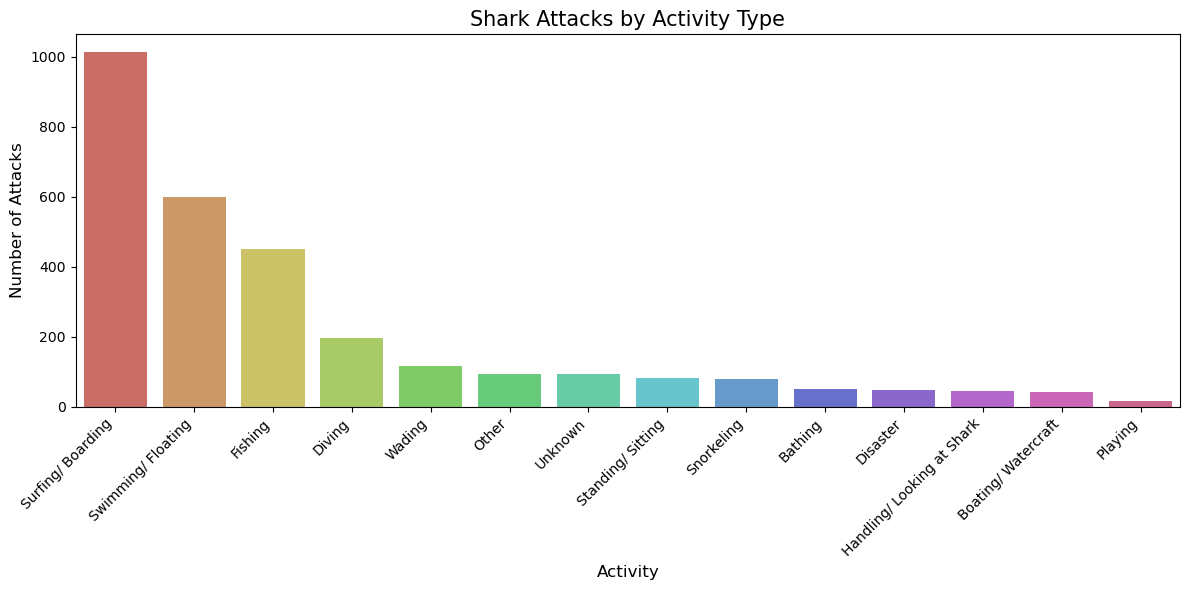

In [34]:
#Activities visualization
plt.figure(figsize=(12, 6))
activity_counts = shark_df_copy['activity'].value_counts()
sns.barplot(x=activity_counts.index, y=activity_counts.values , palette='hls')
plt.title('Shark Attacks by Activity Type', fontsize=15)
plt.xlabel('Activity', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

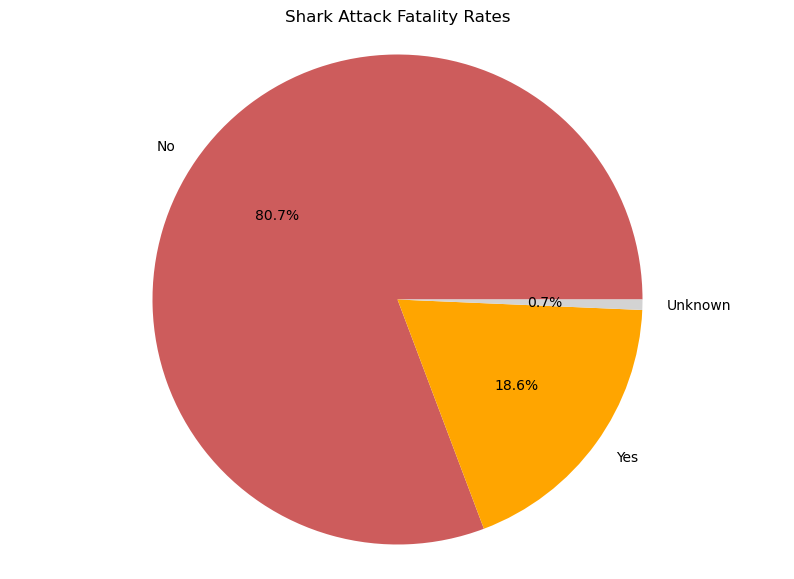

In [35]:
# Fatalities pie
plt.figure(figsize=(10, 7))
fatal_counts = shark_df_copy['was_it_fatal'].value_counts()
plt.pie(fatal_counts, labels=fatal_counts.index, autopct='%1.1f%%',
        colors=['indianred', 'orange', 'lightgray'])
plt.title('Shark Attack Fatality Rates', fontsize=12)
plt.axis('equal')
plt.show()

C:\Users\aurel\AppData\Local\Temp\ipykernel_2264\1585890183.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_counts.index, y=time_counts.values,


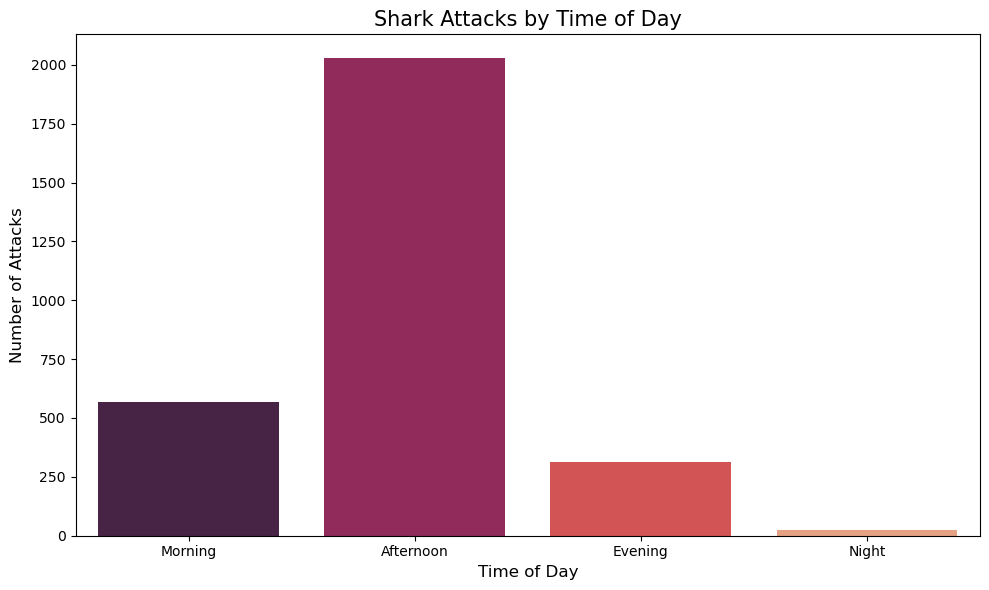

In [36]:
#Attacks by time of the day

plt.figure(figsize=(10, 6))
time_counts = shark_df_copy['time_of_day'].value_counts()
sns.barplot(x=time_counts.index, y=time_counts.values,
            order=['Morning', 'Afternoon', 'Evening', 'Night'], palette='rocket')
plt.title('Shark Attacks by Time of Day', fontsize=15)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\aurel\AppData\Local\Temp\ipykernel_2264\1920673891.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette='rocket')


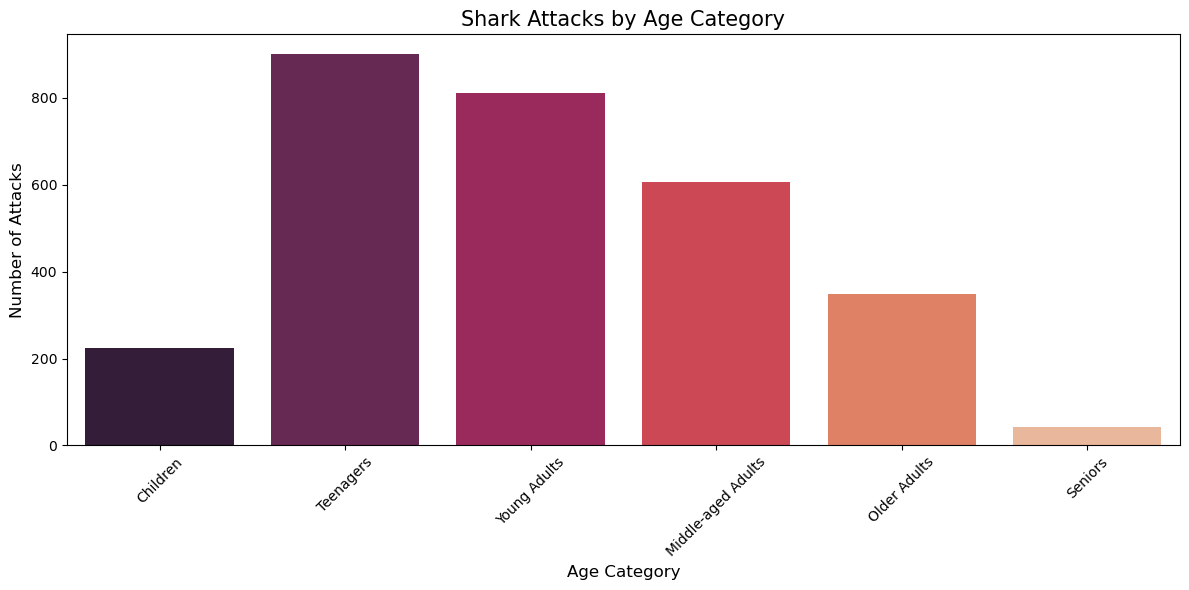

In [37]:
#Shark attacks by age category

plt.figure(figsize=(12, 6))
age_counts = shark_df_copy['age_category'].value_counts()
sns.barplot(x=age_counts.index, y=age_counts.values, palette='rocket')
plt.title('Shark Attacks by Age Category', fontsize=15)
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\aurel\AppData\Local\Temp\ipykernel_2264\590939197.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_counts.index, y=time_counts.values,


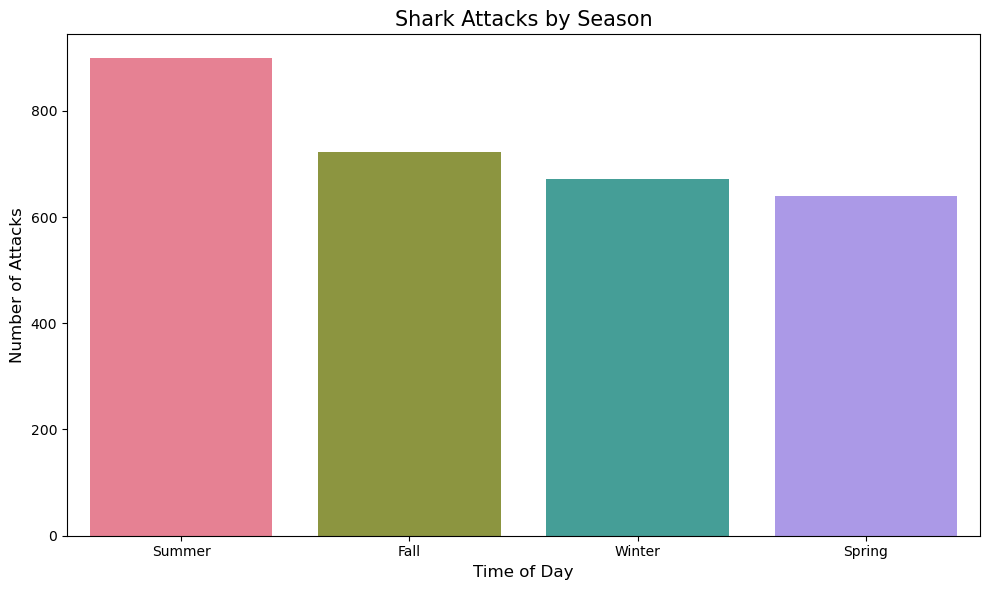

In [38]:
#Shark attacks by season

plt.figure(figsize=(10, 6))
time_counts = shark_df_copy['season'].value_counts()
sns.barplot(x=time_counts.index, y=time_counts.values,
            order=['Summer', 'Fall', 'Winter', 'Spring'], palette='husl')
plt.title('Shark Attacks by Season', fontsize=15)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\aurel\AppData\Local\Temp\ipykernel_2264\1676659144.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countries_counts.index, y=countries_counts.values, palette='husl')


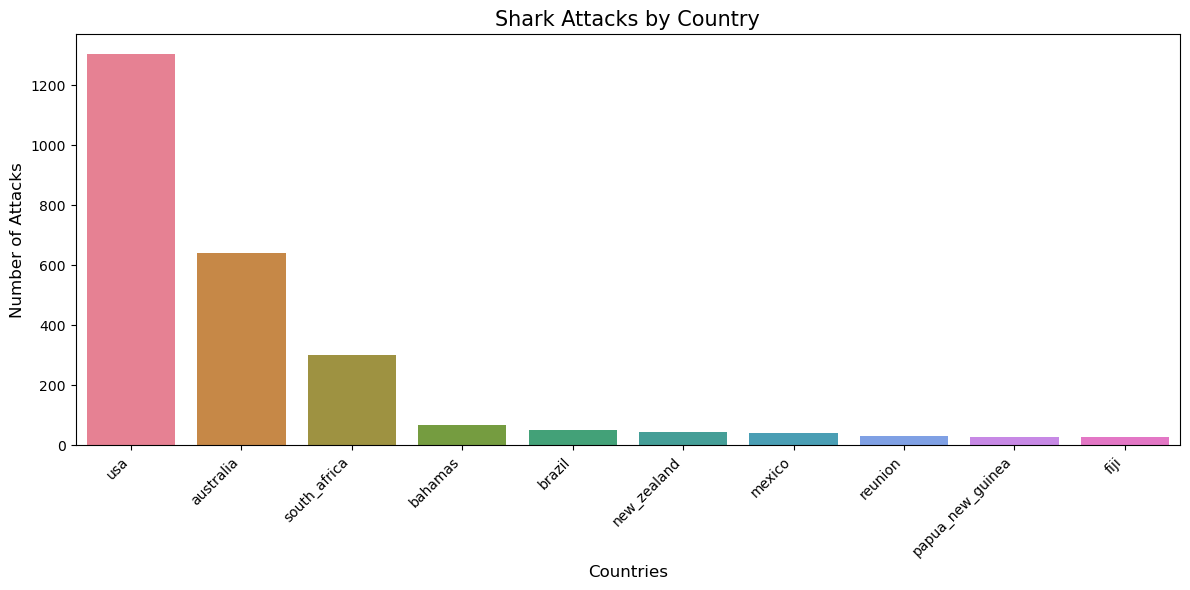

In [39]:
#Shark attacks by country

countries_counts = shark_df_copy['country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=countries_counts.index, y=countries_counts.values, palette='husl')
plt.title('Shark Attacks by Country', fontsize=15)
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

C:\Users\aurel\AppData\Local\Temp\ipykernel_2264\3282637056.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='husl')


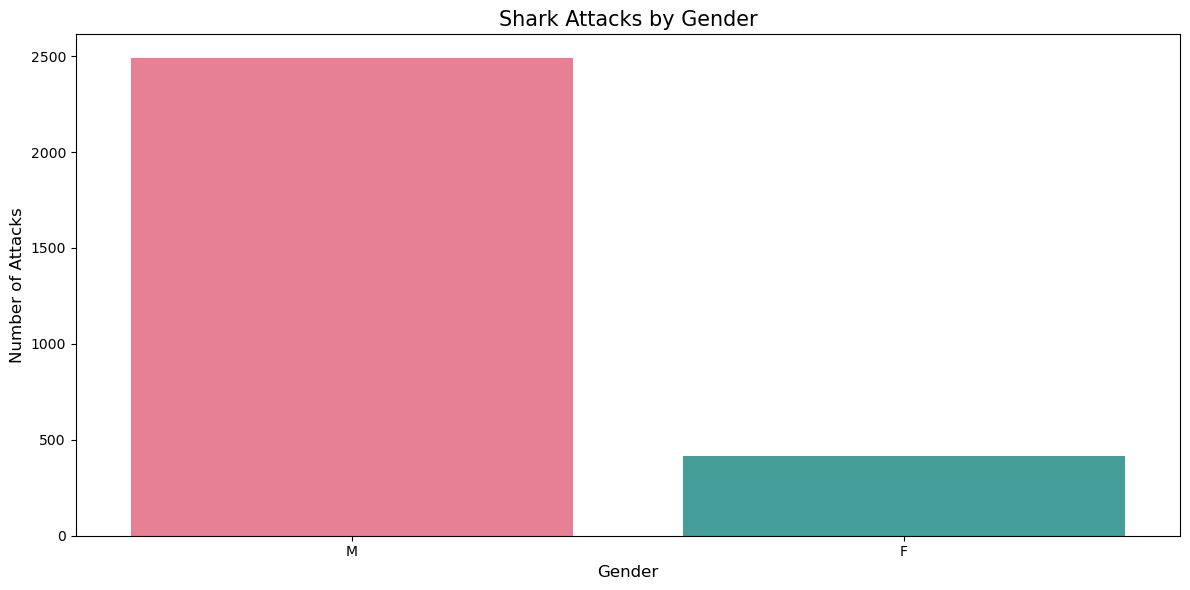

In [40]:
#Shark attacks by gender

gender_counts = shark_df_copy['sex'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='husl')
plt.title('Shark Attacks by Gender', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()